In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,8)
import pylab as plt
from astrometry.libkd.spherematch import *
from astrometry.util.fits import *
import numpy as np
from astrometry.util.starutil_numpy import *
from astrometry.util.plotutils import *
from glob import glob
from collections import Counter

In [2]:
T=fits_table('/Users/dstn/comp-phys/p99-data.fits')

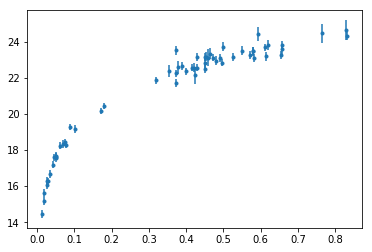

In [3]:
plt.errorbar(T.z, T.m_b_eff, yerr=T.sigma_m_b_eff, fmt='.');

In [4]:
from astropy.cosmology import FlatLambdaCDM

In [5]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [6]:
zz = np.linspace(0.01, 0.9, 100)
DL = cosmo.luminosity_distance(zz)

In [7]:
mm = 5. * np.log10(DL.value / 10.)

In [8]:
DLz = cosmo.luminosity_distance(T.z)
mz = 5. * np.log10(DLz.value / 10.)
M = np.median(T.m_b_eff - mz)
M

10.807637701796471

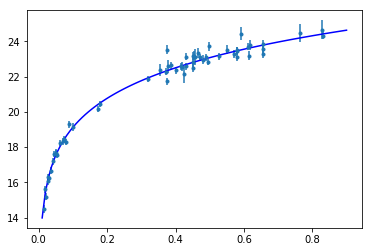

In [9]:
plt.errorbar(T.z, T.m_b_eff, yerr=T.sigma_m_b_eff, fmt='.');
plt.plot(zz, M + mm, 'b-')